In [1]:
# Import Required modules and extablish Connection handle. 
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
connection=sqlite3.connect(':memory:')
cur=connection.cursor()

In [2]:
# Read the CSV data and load into a dataframe
pda=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
pda.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Rename the columns as indicated by the adult.names details
# As per https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

pda.columns=['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
             'relationship','race','sex','capital-gain','capital-loss', 'hours-per-week',
             'native-country','grossincome']
print(pda.head(3))
pda.info()

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   

        marital-status          occupation    relationship    race    sex  \
0        Never-married        Adm-clerical   Not-in-family   White   Male   
1   Married-civ-spouse     Exec-managerial         Husband   White   Male   
2             Divorced   Handlers-cleaners   Not-in-family   White   Male   

   capital-gain  capital-loss  hours-per-week  native-country grossincome  
0          2174             0              40   United-States       <=50K  
1             0             0              13   United-States       <=50K  
2             0             0              40   United-States       <=50K  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               325

In [4]:
# Create database with the columns as in the dataframe. 
sql1="""CREATE TABLE sqladb (
age                  int64,
workclass             text,
fnlwgt               int64,
education             text,
"education-num"      int64,
"marital-status"      text,
occupation            text,
relationship          text,
race                  text,
sex                   text,
"capital-gain"       int64,
"capital-loss"       int64,
"hours-per-week"     int64,
"native-country"      text,
grossincome           text);"""
cur.execute(sql1)

In [5]:
# Insert the values from the dataframe into the database.
cur.executemany('INSERT INTO sqladb values (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)',pda.values)

In [6]:
# Sanity Check - Check the number of rows in the table sqladb
rows=cur.execute('SELECT COUNT(*) FROM sqladb;').fetchall()
print('The number of rows in the dataset is: ', rows[0][0])

The number of rows in the dataset is:  32561


In [7]:
# Select 10 records from the adult sqladb table. 
result1=cur.execute('SELECT * FROM sqladb LIMIT 10;')
print('Showing the first 10 records from the database \n', '*'*45)
for i in range(10):
    print(result1.fetchone())

Showing the first 10 records from the database 
 *********************************************
(39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', ' <=50K')
(50, ' Self-emp-not-inc', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 13, ' United-States', ' <=50K')
(38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K')
(53, ' Private', 234721, ' 11th', 7, ' Married-civ-spouse', ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0, 0, 40, ' United-States', ' <=50K')
(28, ' Private', 338409, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Wife', ' Black', ' Female', 0, 0, 40, ' Cuba', ' <=50K')
(37, ' Private', 284582, ' Masters', 14, ' Married-civ-spouse', ' Exec-managerial', ' Wife', ' White', ' Female', 0, 0, 40, ' United-States'

In [8]:
# Get the average hours per week of all men working in Private sector.
result2=cur.execute('SELECT AVG("hours-per-week") FROM sqladb WHERE sex= " Male" and workclass=" Private";').fetchall()
print('Average hours per week for all men working in Private sector is', result2[0][0])

Average hours per week for all men working in Private sector is 42.22122591006424


In [9]:
# Frequency table for education
result3=cur.execute('SELECT education, COUNT(*) FROM sqladb GROUP BY education;').fetchall()
print('Education, Number of People\n','*'*25)
result3

Education, Number of People
 *************************


[(' 10th', 933),
 (' 11th', 1175),
 (' 12th', 433),
 (' 1st-4th', 168),
 (' 5th-6th', 333),
 (' 7th-8th', 646),
 (' 9th', 514),
 (' Assoc-acdm', 1067),
 (' Assoc-voc', 1382),
 (' Bachelors', 5355),
 (' Doctorate', 413),
 (' HS-grad', 10501),
 (' Masters', 1723),
 (' Preschool', 51),
 (' Prof-school', 576),
 (' Some-college', 7291)]

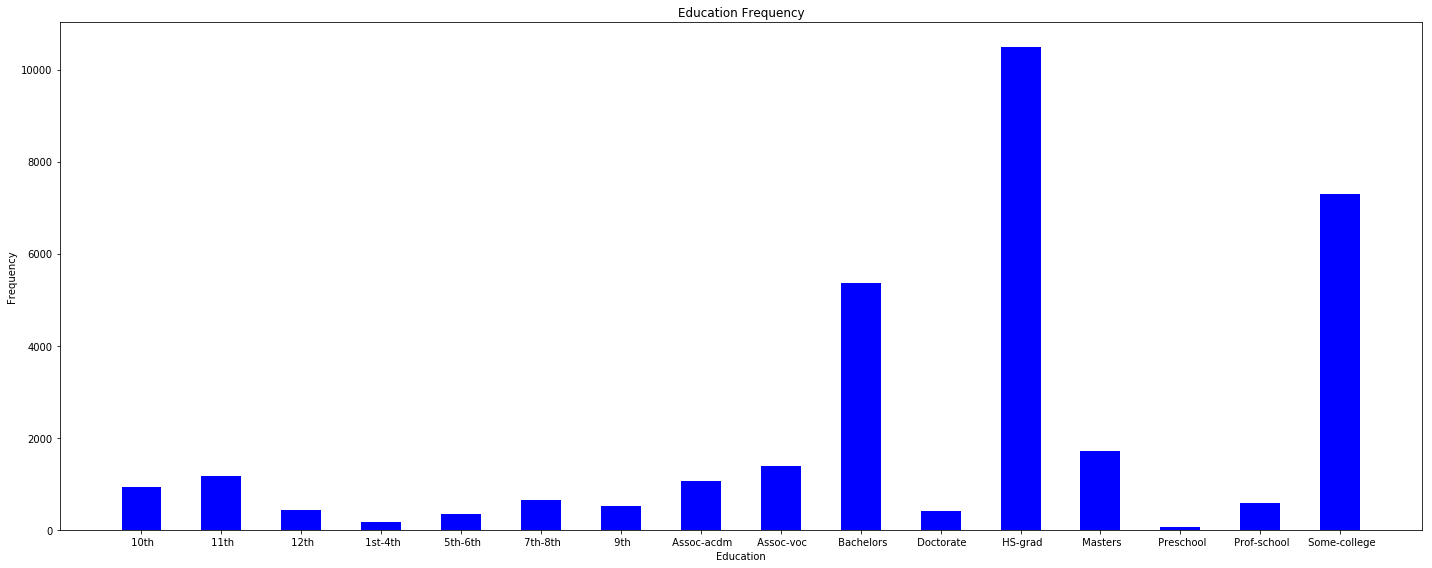

In [10]:
# Plot for Education frequency
education = [x[0] for x in result3]   # Get education values from the result
count1 = [x[1] for x in result3]   # Get frequency (count of people in the category)
fig, ax = plt.subplots(figsize=(20, 8))
bar_width = 0.50
opacity = 1.0
ax.bar(education, count1,bar_width,color='b',alpha=opacity)
ax.set_title("Education Frequency")
ax.set_xlabel('Education')
ax.set_ylabel("Frequency")
fig.tight_layout()
plt.show()

In [11]:
# Frequency table for occupation
result4=cur.execute('SELECT occupation, COUNT(*) FROM sqladb GROUP BY occupation;').fetchall()
print('Occupation, Number of People\n','*'*25)
result4

Occupation, Number of People
 *************************


[(' ?', 1843),
 (' Adm-clerical', 3770),
 (' Armed-Forces', 9),
 (' Craft-repair', 4099),
 (' Exec-managerial', 4066),
 (' Farming-fishing', 994),
 (' Handlers-cleaners', 1370),
 (' Machine-op-inspct', 2002),
 (' Other-service', 3295),
 (' Priv-house-serv', 149),
 (' Prof-specialty', 4140),
 (' Protective-serv', 649),
 (' Sales', 3650),
 (' Tech-support', 928),
 (' Transport-moving', 1597)]

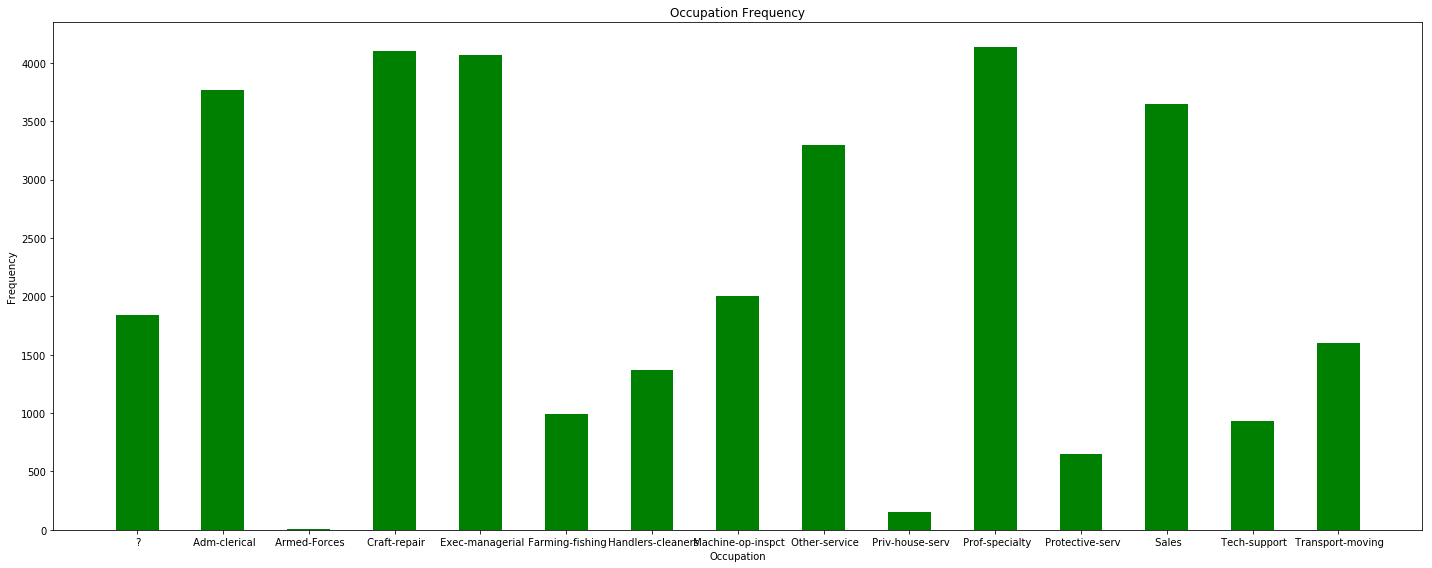

In [12]:
# Plot for Occupation frequency
occupation = [x[0] for x in result4]      # Get occupation values from the result
count2 = [x[1] for x in result4]      # Get frequency (count of people in the category)
fig, ax = plt.subplots(figsize=(20, 8))
bar_width = 0.50
opacity = 1.0
ax.bar(occupation, count2,bar_width,color='g',alpha=opacity)
ax.set_title("Occupation Frequency")
ax.set_xlabel('Occupation')
ax.set_ylabel("Frequency")
fig.tight_layout()
plt.show()

In [13]:
# Frequency table for relationship
result5=cur.execute('SELECT relationship, COUNT(*) FROM sqladb GROUP BY relationship;').fetchall()
print('Relationship, Number of People\n','*'*25)
result5

Relationship, Number of People
 *************************


[(' Husband', 13193),
 (' Not-in-family', 8305),
 (' Other-relative', 981),
 (' Own-child', 5068),
 (' Unmarried', 3446),
 (' Wife', 1568)]

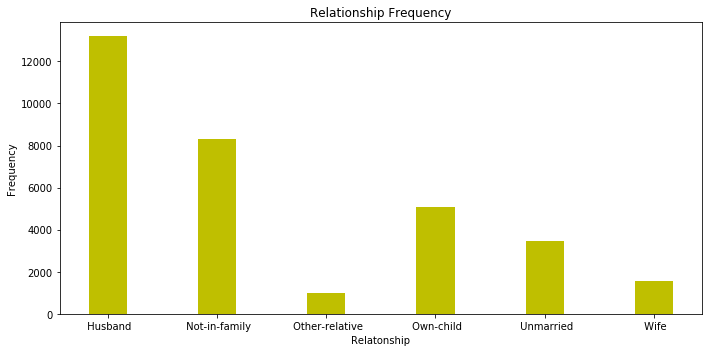

In [14]:
# Plot for Relatioship Frequency
relation = [x[0] for x in result5]         # Get Relationship values from the result
count3 = [x[1] for x in result5]         # Get frequency (count of people in the category)
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
opacity = 1.0
ax.bar(relation, count3,bar_width,color='y',alpha=opacity)
ax.set_title("Relationship Frequency")
ax.set_xlabel('Relatonship')
ax.set_ylabel("Frequency")
fig.tight_layout()
plt.show()

In [15]:
# Check if there are any married people working in Private sector and havig a Masters Degree.
# All people who are with a marital status other than 'Never-married' are considered as Married.

q="""SELECT COUNT(*) FROM sqladb WHERE "marital-status" <> " Never-married" AND 
                                        workclass=" Private" AND education= ' Masters'"""
result6=cur.execute(q).fetchone()
if result6[0] > 0:
    print('Yes, there are ', result6[0], 'married men working in private sector and having a masters degree')
else:
    print('No, there are no married men working in private sector and having a masters degree')

Yes, there are  660 married men working in private sector and having a masters degree


In [16]:
# Get Average, Maximum and Minimum age group of people working in different sectors (or workclass)
q1='SELECT workclass, MAX(age), MIN(age), AVG(age) from sqladb GROUP BY workclass'
result7=cur.execute(q1).fetchall()
print('WorkClass, Maximum Age, Minimum Age, Average Age \n', '*'*50)
result7

WorkClass, Maximum Age, Minimum Age, Average Age 
 **************************************************


[(' ?', 90, 17, 40.960239651416124),
 (' Federal-gov', 90, 17, 42.590625),
 (' Local-gov', 90, 17, 41.75107501194458),
 (' Never-worked', 30, 17, 20.571428571428573),
 (' Private', 90, 17, 36.797585477617204),
 (' Self-emp-inc', 84, 17, 46.01702508960574),
 (' Self-emp-not-inc', 90, 17, 44.96969696969697),
 (' State-gov', 81, 17, 39.43605546995377),
 (' Without-pay', 72, 19, 47.785714285714285)]

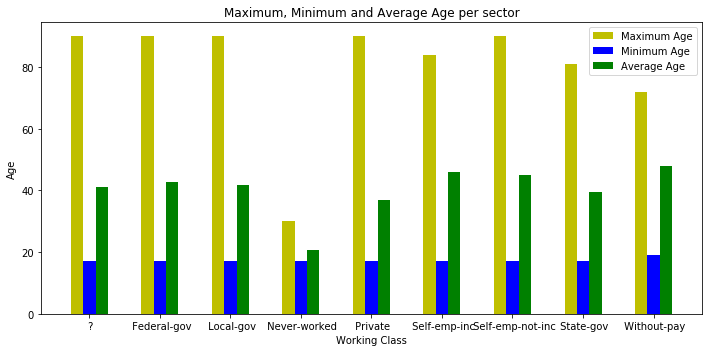

In [17]:
# Plot the maximum, minimum and average age for different working class 

work   = [x[0] for x in result7]    # Get values of workclass
mxage  = [x[1] for x in result7]    # Get values of Maximum age
minage = [x[2] for x in result7]    # Get values of Minumum age 
avgage = [x[3] for x in result7]    # Get values of Average age
fig, ax = plt.subplots(figsize=(10, 5))
bar_width=0.35
ind = np.arange(0,len(work)*2, 2)  # Get the index values corresponding to the workclass
ax.bar(ind,mxage,bar_width,color='y',label="Maximum Age") 
ax.bar(ind+bar_width,minage,bar_width,color='b', label="Minimum Age")
ax.bar(ind+bar_width*2,avgage,bar_width,color='g',label="Average Age")
ax.set_title("Maximum, Minimum and Average Age per sector")
ax.set_xlabel('Working Class')
ax.set_ylabel("Age")
ax.set_xticks(ind+bar_width)
ax.set_xticklabels(work)
fig.tight_layout()
plt.legend()
plt.show()

In [18]:
# Get age distribution by country - Number of people per age in a country

q2="""SELECT "native-country" as Country, age as Age, COUNT(*) as NumberOfPeople FROM sqladb 
       GROUP BY "native-country", age ORDER BY NumberOfPeople"""
result8=cur.execute(q2).fetchall()
print(result8)

[(' ?', 67, 1), (' ?', 69, 1), (' ?', 70, 1), (' ?', 74, 1), (' ?', 76, 1), (' ?', 90, 1), (' Cambodia', 18, 1), (' Cambodia', 25, 1), (' Cambodia', 28, 1), (' Cambodia', 32, 1), (' Cambodia', 34, 1), (' Cambodia', 35, 1), (' Cambodia', 36, 1), (' Cambodia', 42, 1), (' Cambodia', 46, 1), (' Cambodia', 48, 1), (' Cambodia', 50, 1), (' Cambodia', 51, 1), (' Cambodia', 65, 1), (' Canada', 18, 1), (' Canada', 19, 1), (' Canada', 22, 1), (' Canada', 34, 1), (' Canada', 35, 1), (' Canada', 39, 1), (' Canada', 42, 1), (' Canada', 43, 1), (' Canada', 48, 1), (' Canada', 54, 1), (' Canada', 55, 1), (' Canada', 57, 1), (' Canada', 61, 1), (' Canada', 65, 1), (' Canada', 66, 1), (' Canada', 68, 1), (' Canada', 71, 1), (' Canada', 76, 1), (' Canada', 80, 1), (' China', 22, 1), (' China', 25, 1), (' China', 27, 1), (' China', 28, 1), (' China', 29, 1), (' China', 37, 1), (' China', 44, 1), (' China', 49, 1), (' China', 50, 1), (' China', 51, 1), (' China', 57, 1), (' China', 59, 1), (' China', 60, 

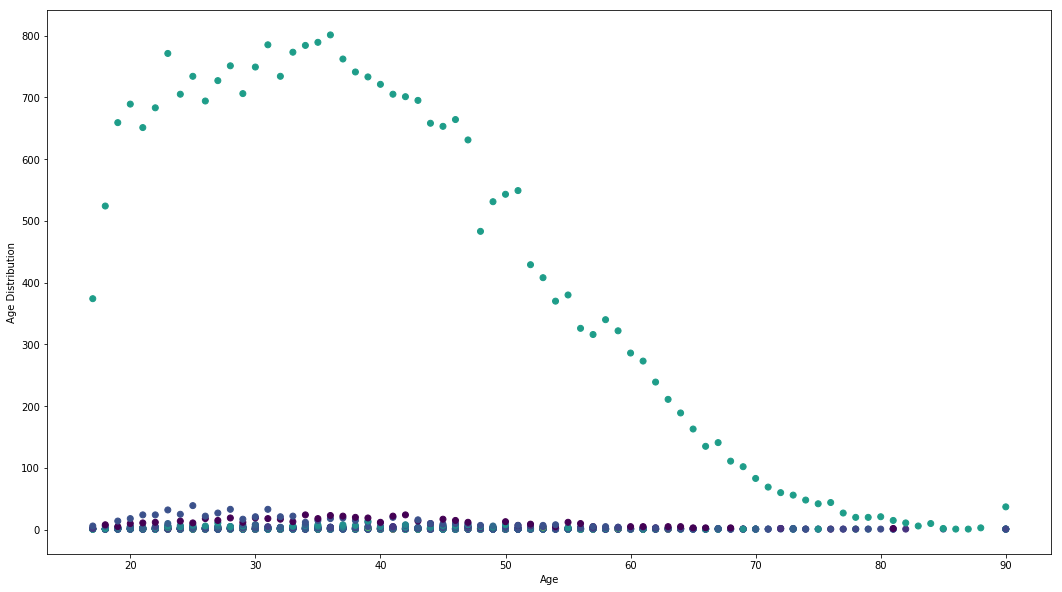

In [19]:
# Create a scatter plot for the age distribution by country

cntry  = [x[0] for x in result8]
age    = [x[1] for x in result8]
count4 = [x[2] for x in result8]
color1 = []      # Get different colours for different countries
for val in cntry:
    l1=list(val)
    color1.append(sum(list(map(lambda x: ord(x), l1))))
plt.figure(figsize=(18,10))
plt.scatter(age,count4,cmap='viridis',c=color1)
plt.xlabel('Age')
plt.ylabel('Age Distribution')
plt.show()

In [20]:
# Compute a new column as 'Net-Capital-Gain' from the two columns 'capital-gain' and 'capital-loss'

# Add a new column to sqladb
cur.execute('ALTER TABLE sqladb ADD COLUMN "Net-Capital-Gain" COLNew int64')

# Display 5 records with the new column. 
result9=cur.execute('SELECT * FROM sqladb LIMIT 5;').fetchall()
print(result9)

[(39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', ' <=50K', None), (50, ' Self-emp-not-inc', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 13, ' United-States', ' <=50K', None), (38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K', None), (53, ' Private', 234721, ' 11th', 7, ' Married-civ-spouse', ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0, 0, 40, ' United-States', ' <=50K', None), (28, ' Private', 338409, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Wife', ' Black', ' Female', 0, 0, 40, ' Cuba', ' <=50K', None)]


In [21]:
# Calculate the value of Net-Capital-Gain as the difference between capital-gain and capital-loss  
cur.execute('UPDATE sqladb SET "Net-Capital-Gain" = "capital-gain" - "capital-loss"') 
print('Showing 10 records from the table sqladb with values to the new column \n','*'*70)
result10=cur.execute('SELECT * FROM sqladb LIMIT 10;')
for i in range(10):
    print(result10.fetchone())

Showing 10 records from the table sqladb with values to the new column 
 **********************************************************************
(39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', ' <=50K', 2174)
(50, ' Self-emp-not-inc', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 13, ' United-States', ' <=50K', 0)
(38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K', 0)
(53, ' Private', 234721, ' 11th', 7, ' Married-civ-spouse', ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0, 0, 40, ' United-States', ' <=50K', 0)
(28, ' Private', 338409, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Wife', ' Black', ' Female', 0, 0, 40, ' Cuba', ' <=50K', 0)
(37, ' Private', 284582, ' Masters', 14, ' Married-civ-spouse', ' Exec-ma

In [22]:
cur.close()
connection.close()